# Creational Patterns

### Singleton

- Having only one object of a class
    - e.g. in game design, you may want to create only a single `Preferences` class, so there is one and only one place that defines where a programme should look at to determine user preference
- Singleton object must be globally accessible 
- How is this implemented?
    - In Java: Make class constructors private, so it cannot be called from outside the class. Then define a method to instantiate the class by calling the private constructor
    - In Python:
        - Implement as a module: ```import Singleton from SingletonModule``` 
            - All imports are singleton by definition
        - Implement through modifying `__new__` dunder


- Another good thing about singletons is that the object is not created until needed (lazy creation)
    

In [13]:
'''Only 1 instance can be created, else the class will return the existing instance'''
class SingletonClass(object):
  def __new__(cls): ##__new__ is always called before __init__
    if not hasattr(cls, 'instance'):
      print("No existing instance, initing new instance")
      cls.instance = super(SingletonClass, cls).__new__(cls)
    else:
      print("Existing instance found, no new instance created")
    return cls.instance

singleton = SingletonClass()
new_singleton = SingletonClass()

No existing instance, initing new instance
Existing instance found, no new instance created


In [14]:
'''Modifying the attribute for the first class automatically modifies the second'''
singleton.singleton_variable = "Singleton Variable"
print(new_singleton.singleton_variable)

Singleton Variable


In [5]:
'''Subclassing a Singleton superclass and trying to create a subclass'''
class SingletonChild(SingletonClass):
    ...
singletonChild = SingletonChild()

Existing instance found, no new instance created


In [22]:
'''
There is another type of pseudo Singletons, where different instantiations of a class are possible, but with a 
common states shared across all instantiations. These are called Borg Singletons.

Breaking down the details here
- We modify the constructor __new__ for the parent BorgSingleton to contain the `_shared_borg_state` class attribute 
within the class attribute dict (__dict__)
- Notice how the class attribute dict (obj.__dict__) is the SAME OBJECT as cls._shared_borg_state (i.e. it is not a 
COPY of cls._shared_borg_state, but points to the same memory address)
- As a result, any modification to the object's attribute will also modify the _shared_borg_state
'''
class BorgSingleton(object):
  _shared_borg_state = {}
   
  def __new__(cls, *args, **kwargs):
    obj = super(BorgSingleton, cls).__new__(cls, *args, **kwargs)
    obj.__dict__ = cls._shared_borg_state
    return obj
   
class ChildBorg(BorgSingleton):
  pass
 
borg = BorgSingleton()
child = ChildBorg()

In [23]:
print(borg.__dict__)
print(child.__dict__)
borg.newattr = 'newattr'
print(borg.__dict__)
print(child.__dict__)

{}
{}
{'newattr': 'newattr'}
{'newattr': 'newattr'}


In [8]:
childBorg.new_attr = '123'
print(childBorg.new_attr)
print(borg.new_attr)

123
123


### Factory method

- Factories are meant to create objects
- Let's suppose we are running a knife store
    - Parent class `Knife`
    - Subclasses `SteakKnife` and `ChefKnife`
    - Method `orderKnife`, which creates a knife object, prepares (`sharpen`, `polish`, `package`), and ships it
    - Depending on what parameter gets passed, an actual knife is **instantiated**.
        - This is called **concrete instatiation**

In [25]:
def orderKnife(knife_type: str):
    if knife_type == 'steak':
        knife = SteakKnife()
    elif knife_type == 'chef':
        knife = ChefKnife()
    elif knife_type == 'someothertype':
        knife = SomeOtherKnife()
    elif ...

    knife.sharpen()
    knife.polish()
    knife.package()

    return knife

- As your store grows, you need to constantly add on more cases to the concrete instantiation! What if you could move the if statement elsewhere??
    - Create a factory object to delegate responsibility of product creation!
    - i.e. make a knife factory

- This factory is then used by the orderKnife method 

In [ ]:
class KnifeFactory:
    def createKnife(knife_type:str):
        if knife_type == 'steak':
            knife = SteakKnife()
        elif knife_type == 'chef':
            knife = ChefKnife()
        elif knife_type == 'someothertype':
            knife = SomeOtherKnife()
        elif ...
        return knife
        
def orderKnife(knife_type: str, knife_factory):
    knife = knife_factory.createKnife(knife_type)

    knife.sharpen()
    knife.polish()
    knife.package()

    return knife

- What are the advantages?
    - Other clients can reuse the factory to get knives, not just your orderKnife method
    - Only 1 source of instantiation, so modifications to the instantiation code only happens in 1 place
    - Concrete methods (sharpen, polish, packge) no longer deal with concrete knife classes, but with knife generalisations
    - This is known as **coding to an interface, not an implementation**

- So far, we talked about using a *factory object* to instantiate product objects

- What is a **factory method** then?
    - Instead of using a factory object to create objects, use a separate method in the same class to create an object
    - The idea is to define an interface for creating objects, but let subclasses decide which class to instantiate

In [ ]:
import abc
class KnifeStore(metaclass=abc.ABCMeta):
    
    def orderKnife(self,knife_type):
        knife = self.createKnife(knife_type)
        knife.sharpen()
        knife.polish()
        knife.package()
        return knife
    
    @abc.abstractmethod
    def createKnife(self, knife_type):
        raise NotImplementedError
    
class Knife(metaclass=abc.ABCMeta):
    ...

class BudgetSteakKnife(Knife):
    ...

class BudgetChefKnife(Knife):
    ...

class BudgetKnifeStore(KnifeStore):
    def createKnife(self, knife_type):
        if knife_type == 'steak':
            return BudgetSteakKnife()
        elif knife_type == 'chef':
            return BudgetChefKnife()
        else:
            return None

- In general the factory method pattern follows this structure

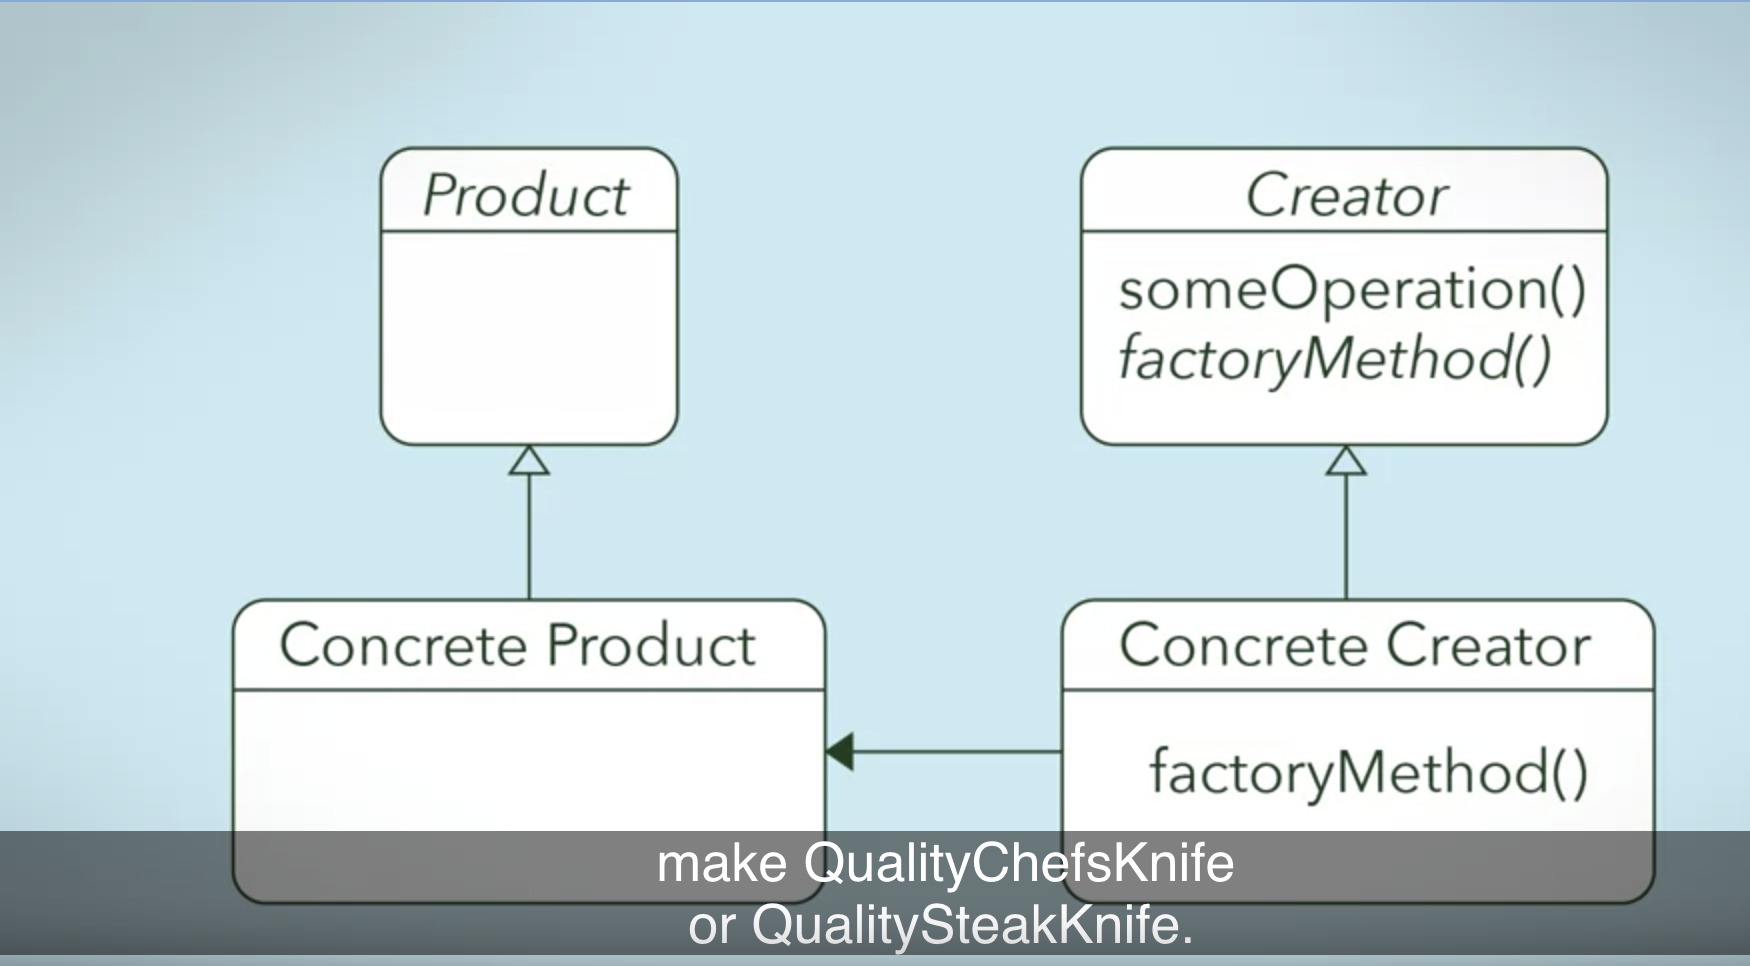